In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
from skimage.segmentation import mark_boundaries
import shap
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
# Prepare the data
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
data_dir = r'C:\Users\rutvik\Downloads\archive\bone_marrow_cell_dataset'

batch_size = 8  # Reduced batch size to lower memory usage
img_height = 224
img_width = 224

train_data_gen = datagen.flow_from_directory(directory=data_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=batch_size,
                                             class_mode='categorical')

# Get the number of classes
num_classes = len(train_data_gen.class_indices)

Found 171374 images belonging to 21 classes.


In [3]:
# Load ResNet50 with ImageNet weights, but exclude the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Change the output layer to match your classes

model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
# Optionally, freeze the base_model layers if you do not want them to be trainable
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

json_file_path = r'C:\Users\rutvik\Downloads\archive\classes.json'  # Update this path if needed
with open(json_file_path) as file:
    class_labels = [v[1] for v in json.load(file).values()]

# Get a batch of images and labels
images, labels = next(train_data_gen)

In [5]:
# Define the prediction function
def f(X):
    tmp = X.copy()
    tmp = preprocess_input(tmp)
    return model.predict(tmp)

# Define X as the batch of images you want to explain
X = images

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step


  0%|          | 0/698 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 623ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 639ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 635ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


PartitionExplainer explainer:  12%|███████▊                                                      | 1/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step


  0%|          | 0/698 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 642ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 646ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 631ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 639ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


PartitionExplainer explainer:  38%|████████████████████▎                                 | 3/8 [01:35<01:52, 22.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step


  0%|          | 0/698 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 654ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 664ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 631ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 638ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


PartitionExplainer explainer:  50%|███████████████████████████                           | 4/8 [02:20<02:07, 31.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step


  0%|          | 0/698 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 639ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 648ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 638ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 643ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


PartitionExplainer explainer:  62%|█████████████████████████████████▊                    | 5/8 [03:05<01:50, 36.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 635ms/step


  0%|          | 0/698 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 646ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 644ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 652ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 620ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 647ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 639ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 644ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 639ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


PartitionExplainer explainer:  75%|████████████████████████████████████████▌             | 6/8 [03:51<01:19, 39.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step


  0%|          | 0/698 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 623ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 622ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 635ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 635ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 624ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 654ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


PartitionExplainer explainer:  88%|███████████████████████████████████████████████▎      | 7/8 [04:35<00:41, 41.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 649ms/step


  0%|          | 0/698 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 764ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 730ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 655ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 635ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


PartitionExplainer explainer: 100%|██████████████████████████████████████████████████████| 8/8 [05:22<00:00, 43.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step


  0%|          | 0/698 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 613ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 640ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 631ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 635ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 631ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


PartitionExplainer explainer: 9it [06:08, 46.12s/it]                                                                   
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-111.779..148.061].


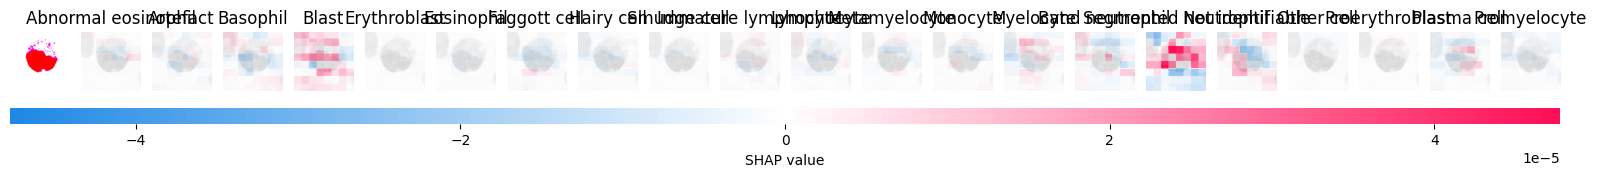

In [6]:
# Initialize the SHAP masker
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# Initialize the SHAP explainer
explainer = shap.Explainer(f, masker, output_names=class_labels)

# Compute SHAP values for a sample of the data with reduced max_evals and batch_size
shap_values = explainer(X, max_evals=700, batch_size=50)

# Plot SHAP values for the explained images
shap.image_plot(shap_values[0])